#### 2. SmartSeq\MCF7_SmartS_Unfiltered_Data.txt


We will analyze this second unfiltered data applying techniques and methods already explained in the first analysis.

In [75]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
import torch as th
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import nbinom
from scipy.stats import gamma
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [37]:
#We just create the path and the dataset on Python
df_seq_pathHFilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Data.txt'

df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathHUnfilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt'

df_seq_pathMFilt = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Data.txt'

df_seq_pathMFiltNorm = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathMUnfilt = '../ai_lab/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt'

df_seq_HFilt = pd.read_csv(df_seq_pathHFilt, delimiter=' ')

df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

df_seq_HUnfilt = pd.read_csv(df_seq_pathHUnfilt, delimiter=' ')

df_seq_MFilt = pd.read_csv(df_seq_pathMFilt, delimiter=' ')

df_seq_MFiltNorm = pd.read_csv(df_seq_pathMFiltNorm, delimiter=' ')

df_seq_MUnfilt = pd.read_csv(df_seq_pathMUnfilt, delimiter=' ')

In [38]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')

In [39]:
# df_metaM = df_metaM.drop(columns=['Filename'])
df_metaM.head()

,Filename,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Condition
Norm    192
Hypo    191
Name: count, dtype: int64


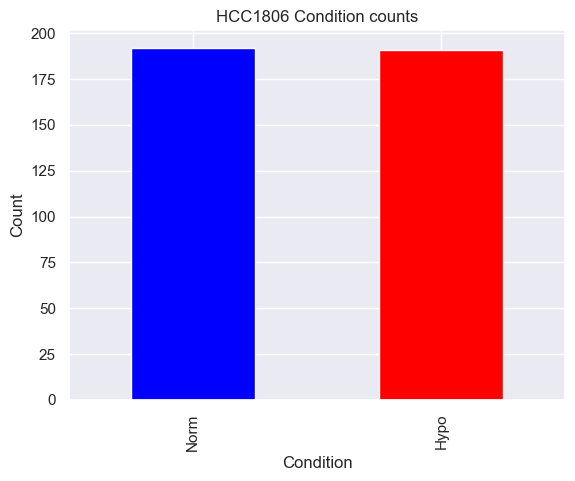

In [51]:
# before starting the analysis of seqdata we check the counts for Norm or Hypo as we did for the other dataset
# in the column 'Condition' for both the datasets count the number of Norm and Hypo
counts = df_metaM['Condition'].value_counts()
# Histogram of the counts
print(counts)
# Plot the histogram with two columns for each condition
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('HCC1806 Condition counts')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [40]:
# Focus now on MCF7 Unfiltered
print("Dataframe dimension:", df_seq_MUnfilt.shape)
print("First Column:", df_seq_MUnfilt.iloc[:,0])
print("Columns list:", list(df_seq_MUnfilt.columns))

Dataframe dimension: (22934, 383)
First Column: WASH7P         0
MIR6859-1      0
WASH9P         1
OR4F29         0
MTND1P23       0
            ... 
MT-TE          4
MT-CYB       270
MT-TT          0
MT-TP          5
MAFIP          8
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, Length: 22934, dtype: int64
Columns list: ['output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam', 'output.STAR

In [41]:
# Take the transpose of the dataframe
print("Dataframe dimension before transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt = df_seq_MUnfilt.T
print("Dataframe dimension after transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt.head(5)

Dataframe dimension before transpose: (22934, 383)
Dataframe dimension after transpose: (383, 22934)


,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,1,0,0,44,8,0,66,0,1,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0


In [42]:
# Now we look at evetual missing values in the dataframe
print("Missing values in the dataframe by columns:", df_seq_HUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_HUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        0
                                                                       ..
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     0
Length: 243, dtype: int64
Missing values in the whole dataframe: 0


In [43]:
# Summary statistics of the dataframe
df_seq_MUnfilt.describe()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000
mean,0.133159,0.026110,1.344648,0.05483,0.049608,6.261097,4.681462,0.524804,0.073107,222.054830,...,1.060052,0.443864,3.146214,1016.477807,204.600522,5.049608,2374.97389,2.083551,5.626632,1.749347
std,0.618664,0.249286,2.244543,0.31477,0.229143,7.565749,6.232649,0.980857,0.298131,262.616874,...,1.990566,1.090827,4.265352,1009.444811,220.781927,6.644302,2920.39000,3.372714,7.511180,3.895204
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,172.000000,30.500000,0.000000,216.50000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,0.000000,98.000000,...,0.000000,0.000000,1.000000,837.000000,152.000000,3.000000,785.00000,0.000000,3.000000,0.000000
75%,0.000000,0.000000,2.000000,0.00000,0.000000,10.000000,7.000000,1.000000,0.000000,370.500000,...,1.000000,0.000000,5.000000,1549.000000,294.000000,7.000000,4059.00000,3.000000,8.000000,2.000000
max,9.000000,4.000000,20.000000,3.00000,2.000000,45.000000,36.000000,6.000000,2.000000,1662.000000,...,15.000000,8.000000,22.000000,8115.000000,2002.000000,46.000000,16026.00000,22.000000,56.000000,32.000000


In [44]:
# We proceed adding the target column (class) to the dataframe as we did with the other one
print(df_metaM.columns)
df_metaM.set_index('Filename', inplace=True)
# Merge the two dataframes with key 'Filename'
merged_df = pd.merge(df_seq_MUnfilt, df_metaM['Condition'], left_index=True, right_index=True)
print(merged_df.columns)

Index(['Filename', 'Cell Line', 'Lane', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')
Index(['WASH7P', 'MIR6859-1', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28',
       'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1',
       ...
       'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT',
       'MT-TP', 'MAFIP', 'Condition'],
      dtype='object', length=22935)


In [49]:
# Note that once again we will consider 1 = Hypo, 0 = Norm
# and transform the categorical variable 'Condition' to numerical
dummy_variables = pd.get_dummies(merged_df['Condition'], prefix='category').astype('int')
merged = pd.concat([merged_df, dummy_variables], axis=1)
merged.drop(columns=['category_Hypo', 'Condition'], inplace=True)
merged.rename(columns={'category_Norm': 'Target'}, inplace=True)


In [50]:
merged.head()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1


We are now ready to replicate the work done in the first analysis, but this time with this dataset

Duplicates

In [52]:
# Check for duplicates
print("Number of duplicates in the dataframe:", merged.duplicated().sum())
# we will now check for duplicates in a broader sense, by checking for observations with high correlation
# we start by computing the correlation matrix of the observations
merged_t = merged.T
correlation_matrix_transpose = merged_t.corr()
correlation_matrix_transpose

Number of duplicates in the dataframe: 0


,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,1.000000,0.292568,0.808329,0.697869,0.721242,0.642948,0.709258,0.617521,0.618802,0.900563,...,0.838974,0.521685,0.163054,0.560572,0.554862,0.570942,0.668708,0.457658,0.890291,0.874445
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0.292568,1.000000,0.146217,0.182917,0.212992,0.171827,0.222140,0.148964,0.171648,0.220787,...,0.196892,0.136906,0.116034,0.145569,0.135938,0.110866,0.141657,0.137021,0.254233,0.199633
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0.808329,0.146217,1.000000,0.646251,0.600347,0.588118,0.635104,0.576847,0.604278,0.844294,...,0.802609,0.540563,0.132710,0.547429,0.576651,0.607403,0.693280,0.609518,0.843927,0.851434
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0.697869,0.182917,0.646251,1.000000,0.715393,0.692160,0.780425,0.692138,0.760664,0.775325,...,0.736469,0.706532,0.346201,0.662225,0.759793,0.689692,0.783976,0.451558,0.667993,0.719326
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0.721242,0.212992,0.600347,0.715393,1.000000,0.955126,0.895659,0.943620,0.869165,0.838086,...,0.679766,0.823230,0.172095,0.902144,0.865805,0.883352,0.698426,0.328031,0.566170,0.667336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,0.570942,0.110866,0.607403,0.689692,0.883352,0.943476,0.814205,0.952035,0.872970,0.812373,...,0.709049,0.906920,0.185689,0.960814,0.883501,1.000000,0.787862,0.400531,0.493472,0.685103
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0.668708,0.141657,0.693280,0.783976,0.698426,0.715533,0.754376,0.732181,0.796330,0.835110,...,0.831946,0.726841,0.266785,0.711426,0.762548,0.787862,1.000000,0.520820,0.692175,0.819344
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,0.457658,0.137021,0.609518,0.451558,0.328031,0.361448,0.425278,0.348934,0.412812,0.533597,...,0.651184,0.395979,0.210007,0.349746,0.428147,0.400531,0.520820,1.000000,0.679017,0.540682
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,0.890291,0.254233,0.843927,0.667993,0.566170,0.515361,0.630720,0.509921,0.550141,0.853657,...,0.841475,0.460455,0.189959,0.459973,0.487937,0.493472,0.692175,0.679017,1.000000,0.891253


In [53]:
# now we will check for observations with high correlation and drop them
columns_to_keep = []

def add_representative(corr_matrix, col, threshold=0.95):
    corr = corr_matrix[col].drop(col)
    max_corr_id = corr.idxmax()
    max_corr = corr[max_corr_id]
    if max_corr < threshold:
        columns_to_keep.append(col)
        return None
    else:
        if (col not in columns_to_keep) and (max_corr_id not in columns_to_keep):
            columns_to_keep.append(col)
            print('choosing %s as representative for %s with correlation %s' % (col, max_corr_id, max_corr))
            return None
        


for col in merged_t:
    add_representative(correlation_matrix_transpose, col, 0.95)

dropped_cols = [col for col in merged_t if col not in columns_to_keep]

merged_uncorr_obs = merged_t[columns_to_keep].T
print('dropped %s observations' % str(len(dropped_cols)))
merged_uncorr_obs

choosing output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam as representative for output.STAR.2_E9_Hypo_S225_Aligned.sortedByCoord.out.bam with correlation 0.9605716902488991
choosing output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam as representative for output.STAR.1_F1_Norm_S241_Aligned.sortedByCoord.out.bam with correlation 0.9754973605458132
choosing output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam as representative for output.STAR.1_E5_Norm_S197_Aligned.sortedByCoord.out.bam with correlation 0.980653715556717
choosing output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam as representative for output.STAR.4_D6_Norm_S168_Aligned.sortedByCoord.out.bam with correlation 0.983412359539153
choosing output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam as representative for output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam with correlation 0.9655061013299151
choosing output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam as representative for output.STAR.3_A11_

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,0,0,0,0,1,45,35,1,2,1662,...,4,11,3814,538,12,12761,4,56,0,1
output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,0,0,0,131,...,0,1,452,19,0,1368,0,2,1,1
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,5,5,0,370,...,0,2,1612,215,6,3477,3,7,6,1
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1,0,1,0,0,7,0,0,0,33,...,0,0,62,20,0,349,0,2,0,0


In [54]:
# Check for sparsity
total_elements = merged.shape[0] * merged.shape[1]
print("Total number of elements in the DataFrame:", total_elements)
missing_values = (merged == 0).sum().sum()
print("Total number of missing values in the DataFrame:", missing_values)
# Calculate the sparsity as the percentage of missing values
sparsity = (missing_values / total_elements) * 100
print("Sparsity of the DataFrame: {:.2f}%".format(sparsity))

Total number of elements in the DataFrame: 8784105
Total number of missing values in the DataFrame: 5289337
Sparsity of the DataFrame: 60.21%


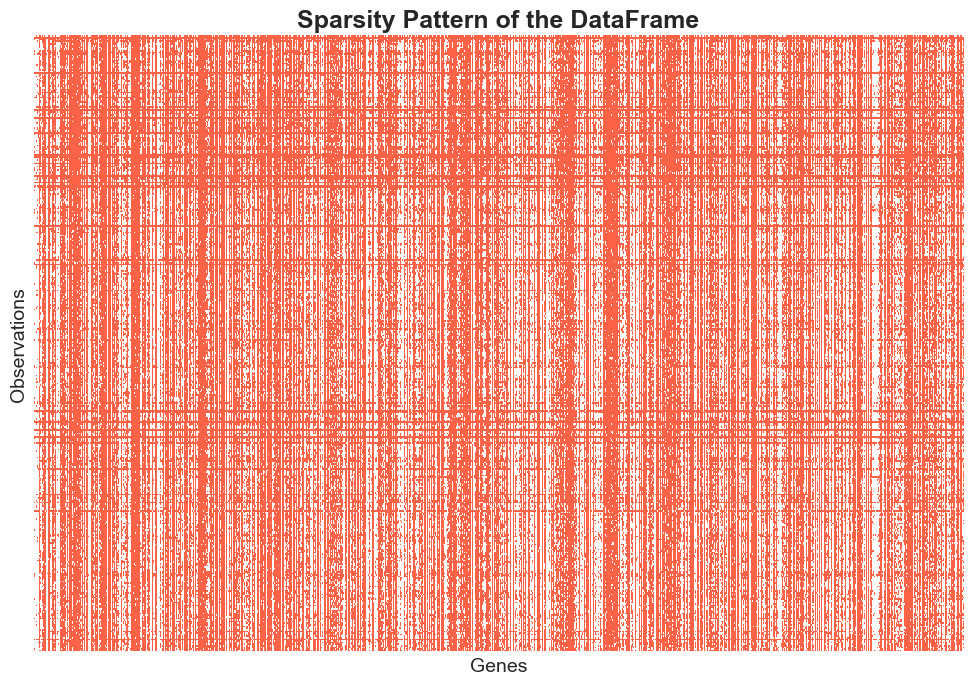

In [55]:
# Visualization of sparsity
# Assuming merged is your DataFrame

# Create a binary DataFrame indicating missing values (1 for missing, 0 for not missing)
missing_mask = merged == 0

# Set up a custom color palette
colors = ["#FFFFFF", "#FF6347"]  # White for non-missing, red for missing

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cmap=sns.color_palette(colors), cbar=False, xticklabels=False, yticklabels=False)

# Add title and labels with custom font size and style
plt.title('Sparsity Pattern of the DataFrame', fontsize=18, fontweight='bold')
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Observations', fontsize=14)



# Remove the spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


NaNs

In [56]:
# Check for NaN values
print("Number of NaN values in the DataFrame:", merged.isna().sum().sum())

Number of NaN values in the DataFrame: 0


Outliers

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning

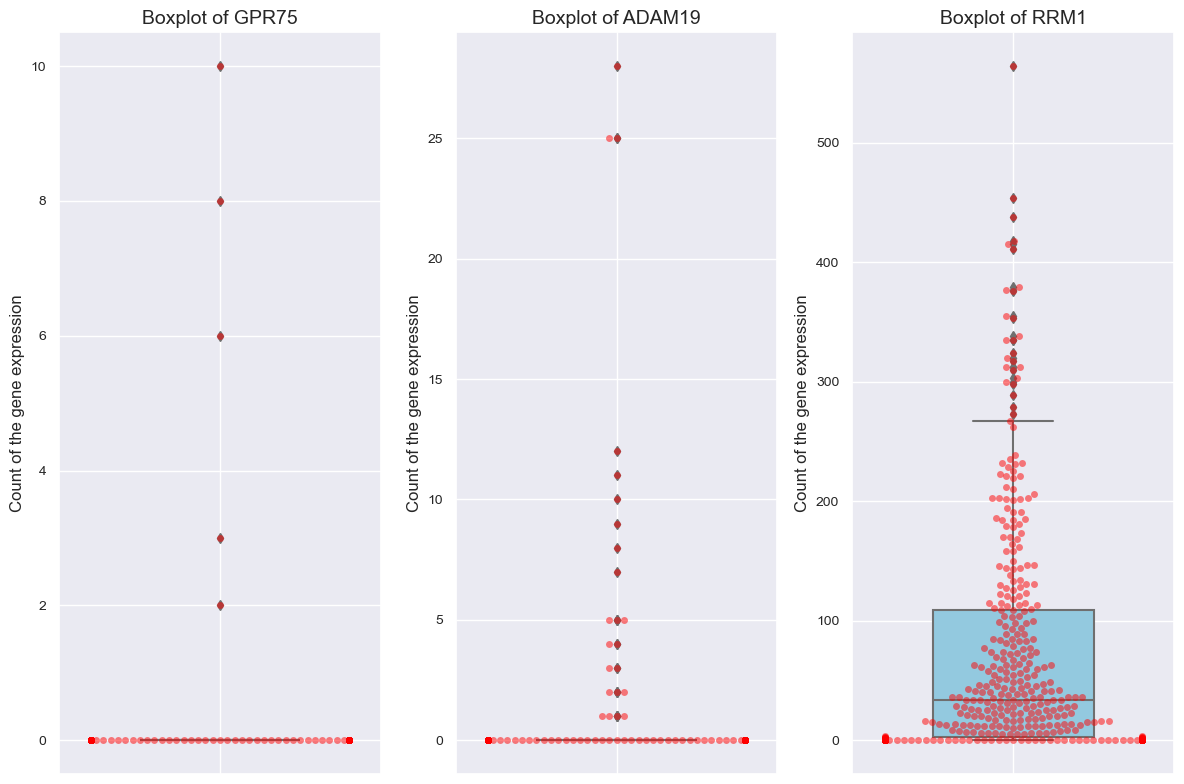

In [62]:
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 5

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)


plt.figure(figsize=(12, 8))  
for i, column in enumerate(random_columns):
    plt.subplot(1, len(random_columns), i+1)
    
    # Customizing boxplot appearance
    sns.boxplot(y=merged[column], color='skyblue', width=0.5)
    
    # Overlaying swarmplot for better visualization of individual data points
    sns.swarmplot(y=merged[column], color='red', alpha=0.5)
    
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel('Count of the gene expression', fontsize=12)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)


plt.tight_layout()
plt.show()

In [64]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = merged.quantile(0.25)
Q3 = merged.quantile(0.75)
IQR = Q3 - Q1
outliers = (merged < (Q1 - 1.5 * IQR)) | (merged > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: WASH7P       32
MIR6859-1     6
WASH9P       18
OR4F29       14
MTND1P23     18
             ..
MT-CYB       10
MT-TT        27
MT-TP        21
MAFIP        37
Target        0
Length: 22935, dtype: int64
6.19%


Distribution of the dataset with rows as cells and columns as genes

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

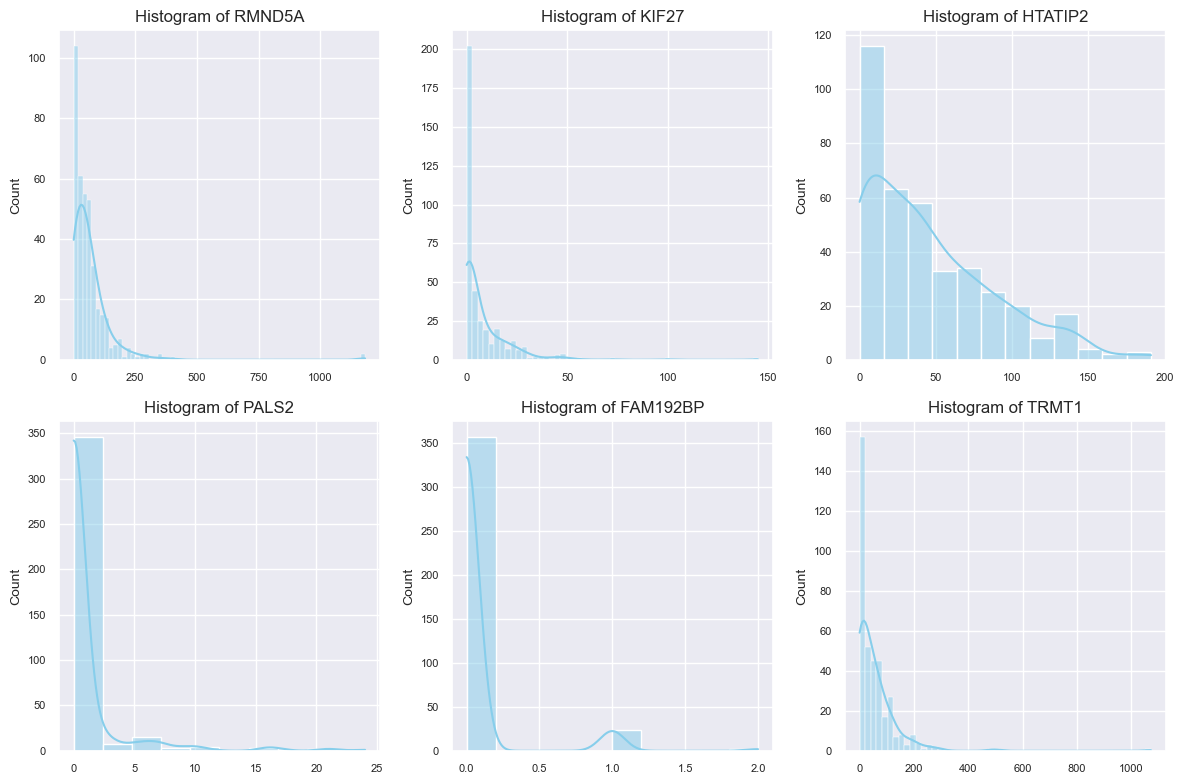

In [66]:
#visualize the distribution of the data through histograms
np.random.seed(30)

# Number of boxplots you want to create
num_boxplots = 6

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    sns.histplot(merged[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
# Calculate skewness for each column in your DataFrame
skewness_values = merged[random_columns].skew()

# Print skewness values
print("Skewness for each selected feature:")
print(skewness_values)

Skewness for each selected feature:
RMND5A      7.218394
KIF27       4.382496
HTATIP2     1.013072
PALS2       4.642870
FAM192BP    3.988794
TRMT1       5.734548
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


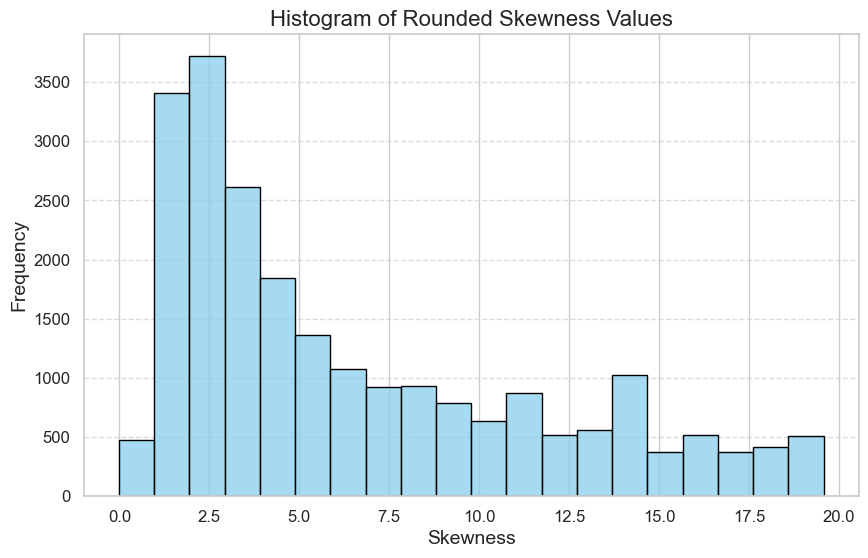

In [68]:
# Calculate skewness for each column in your DataFrame
skewness_values = merged.skew()

# Round the skewness values
rounded_skewness_values = np.round(skewness_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_skewness_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Skewness Values', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [69]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged[random_columns].kurtosis()

# Print kurtosis values
print("Kurtosis for each feature:")
print(kurtosis_values)

Kurtosis for each feature:
RMND5A      73.086830
KIF27       31.477321
HTATIP2      0.485427
PALS2       24.437901
FAM192BP    16.567721
TRMT1       57.275616
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


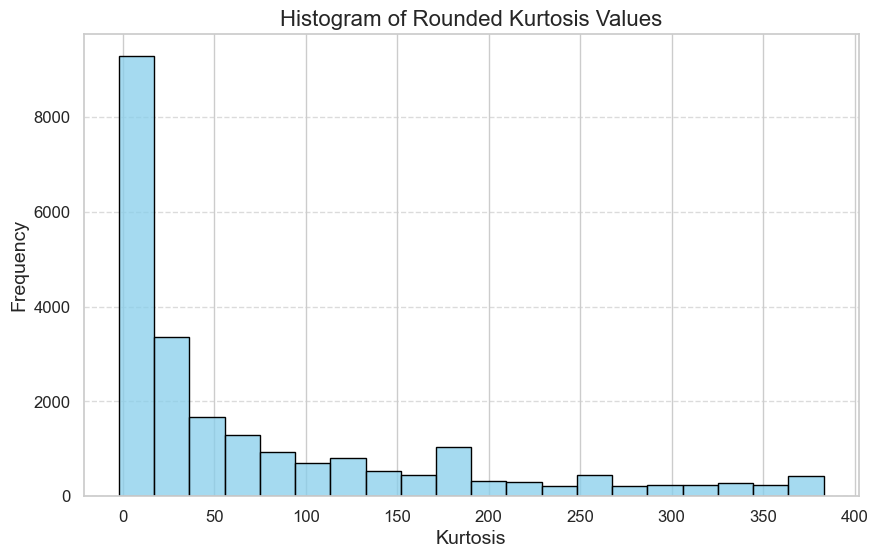

In [70]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged.kurtosis()

# Round the kurtosis values
rounded_kurtosis_values = np.round(kurtosis_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded kurtosis values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_kurtosis_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Kurtosis Values', fontsize=16)
plt.xlabel('Kurtosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [72]:
# Test the distribution of the data matrix using Kolmogorov-Smirnov
# Test normality of each feature
def test_distribution_per_feature(data):
    non_normal_count = 0
    for column in data.columns:
        p_value = kstest(data[column], 'norm')[1]
        if p_value < 0.05:
            non_normal_count += 1
    print("Number of features with non-normal distribution:", non_normal_count)
    if data.shape[1] == non_normal_count:
        print("All features have non-normal distribution")
    else:
        print("Not all features have non-normal distribution")
    return non_normal_count

non_normal_count = test_distribution_per_feature(merged)


Number of features with non-normal distribution: 22935
All features have non-normal distribution


In [73]:
# Iterate over columns and perform the test
def test_poissondistribution_per_feature(data):
    poisson_list = [] # initialize list to store features with Poisson distribution
    for column in data.columns:
        observed_values = data[column].values  # values of the column
        support = np.unique(observed_values) # unique values in the column
        mean = observed_values.mean() # mean of the column (we will need this for the Poisson distribution)
        obs_freq = [] # initialize an empty array to store observed frequencies
        for value in support:
            obs_freq.append((observed_values == value).sum()) # count the number of times each unique value appears in the column
        exp_freq = [] # initialize an empty array to store expected frequencies
        for value in support:
            exp_freq.append(poisson.pmf(value, mean) * len(observed_values)) # calculate the expected frequency for each unique value
        # normalize the observed and expected frequencies
        obs_freq = obs_freq / np.sum(obs_freq)
        exp_freq = exp_freq / np.sum(exp_freq)
        
        # perform the chi-square test
        _, p = chisquare(obs_freq, exp_freq)
        
        # if p-value is greater than 0.05, we don't reject the null hypothesis that the data doesn't follow a Poisson distribution
        if p >= 0.05:
            poisson_list.append(column)
    print("Number of features that might have poisson distribution:", len(poisson_list))
    if len(poisson_list) == 0:
        print("All features have non-poisson distribution")
    else:
        print("Some features might have poisson distribution")
    return poisson_list

poisson_columns = test_poissondistribution_per_feature(merged)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Number of features that might have poisson distribution: 2886
Some features might have poisson distribution


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

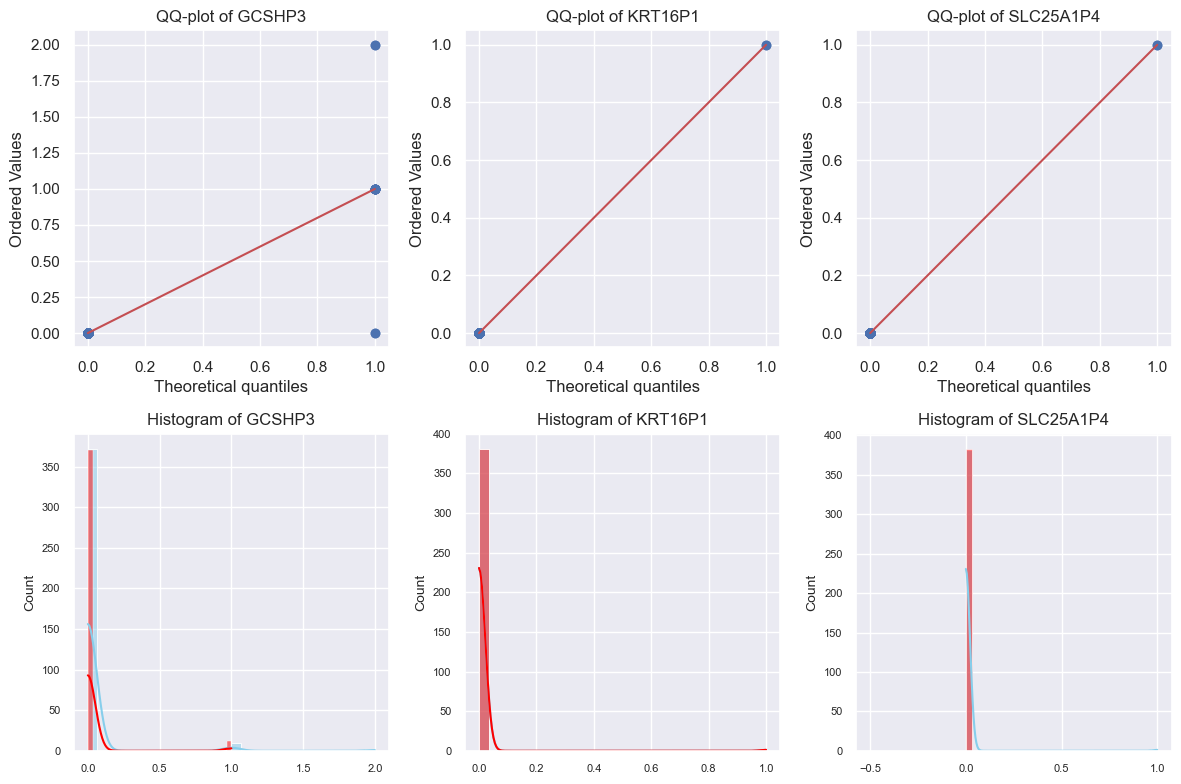

In [76]:
# now we plot the hist of the poisson columns
#now we visualize the empirical distribution against the Gamma distribution for some columns
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(poisson_columns, num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    observed_values = merged[column].values  # Observed counts from your data
    mean = observed_values.mean()
    poisson_values = np.random.poisson(mean, len(observed_values))
    
    stats.probplot(observed_values, dist='poisson', sparams=(mean,), plot=plt)
    plt.title(f'QQ-plot of {column}', fontsize=12)

    plt.subplot(2, 3, i+4)
    sns.histplot(observed_values, kde=True, color='skyblue', label='Observed', bins=30)
    sns.histplot(poisson_values, kde=True, color='red', label='Gamma', bins=30)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Iterate over columns and perform the test
def test_negative_binomial_distribution_per_feature(data):
    nbin_list = [] # initialize list to store features with Gamma distribution
    for column in data.columns:
        observed_values = data[column].values  # values of the column
        support = np.unique(observed_values) # unique values in the column
        mean = observed_values.mean() # mean of the column (we will need this for the nbinom distribution)
        var = observed_values.var() # variance of the column (we will need this for the nbinom distribution)
        size = mean ** 2 / (var - mean) # size parameter of the nbinom distribution
        prob = 1 - (mean/var) # probability parameter of the nbinom distribution
        obs_freq = [] # initialize an empty array to store observed frequencies
        for value in support:
            obs_freq.append((observed_values == value).sum()) # count the number of times each unique value appears in the column
        exp_freq = [] # initialize an empty array to store expected frequencies
        for value in support:
            exp_freq.append(nbinom.pmf(value, size, prob) * len(observed_values)) # calculate the expected frequency for each unique value
        # normalize the observed and expected frequencies
        obs_freq = obs_freq / np.sum(obs_freq)
        exp_freq = exp_freq / np.sum(exp_freq)
        
        # perform the chi-square test
        _, p = chisquare(obs_freq, exp_freq)
        
        # if p-value is greater than 0.05, we don't reject the null hypothesis that the data doesn't follow a negative binomial distribution
        if p >= 0.05:
            nbin_list.append(column)
    print("Number of features with Negative Binomial distribution:", len(nbin_list))
    if len(nbin_list) == 0:
        print("All features have non-Negative Binomial distribution")
    else:
        print("Some features might have Negative Binomial distribution")
    return nbin_list

negative_binomial_columns = test_negative_binomial_distribution_per_feature(merged)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/l4/fwn11xh17pb5ryvd5h_w9p8r0000gn/T/ipykernel_7269/2698146044.py:19: RuntimeWarning: invalid value encountered in divide
  exp_freq = exp_freq / np.sum(exp_freq)


Number of features with Negative Binomial distribution: 2814
Some features might have Negative Binomial distribution


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

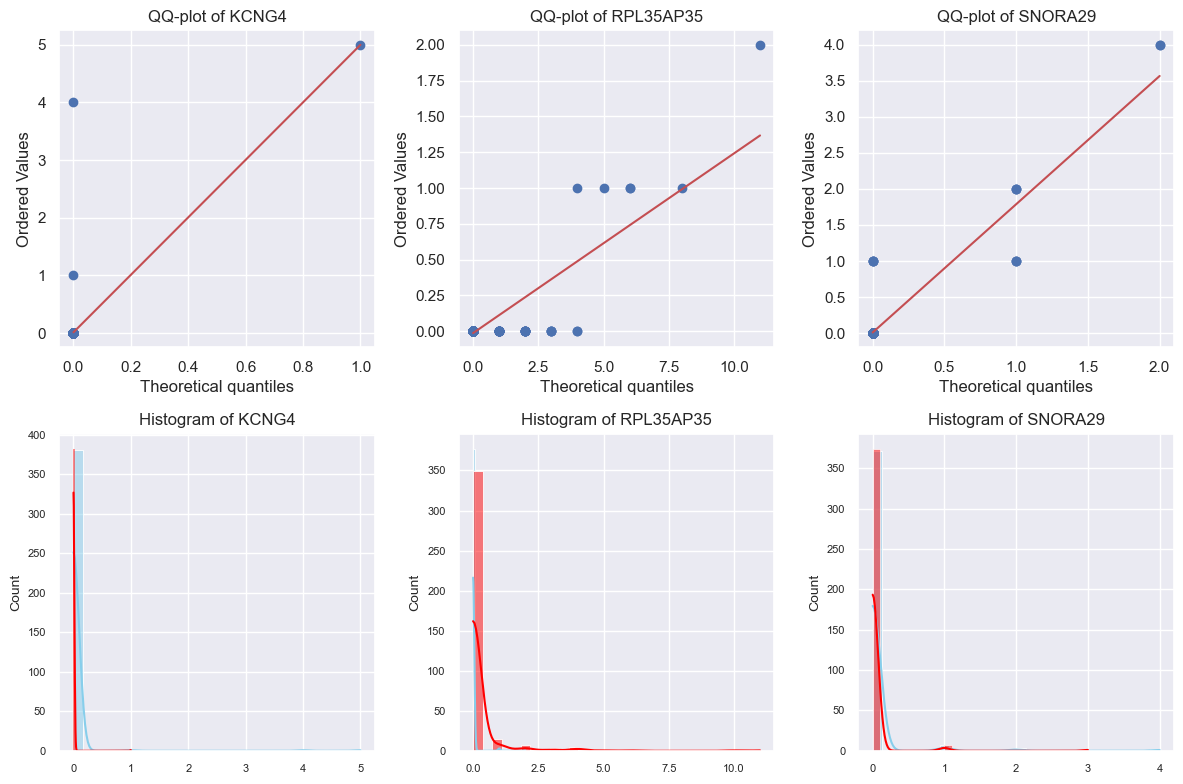

In [78]:
# now we plot the hist of the nbin columns
#now we visualize the empirical distribution against the negative binomial distribution for some columns

np.random.seed(100)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(negative_binomial_columns, num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    observed_values = merged[column].values  # Observed counts from your data
    mean = observed_values.mean() # mean of the column (we will need this for the nbinom distribution)
    var = observed_values.var() # variance of the column (we will need this for the nbinom distribution)
    # HERE WE ARE CHEATING WITH THE ABSOLUTE VALUE AND THE "NORMALIZATION" OF THE PROB
    size = abs(mean ** 2 / (var - mean)) # size parameter of the nbinom distribution
    prob = 1 - (mean/var) # probability parameter of the nbinom distribution
    if prob < 0:
        prob = 0
    elif prob > 1:
        prob = 1


    stats.probplot(observed_values, dist='nbinom', sparams=(size,prob), plot=plt)
    plt.title(f'QQ-plot of {column}', fontsize=12)

    plt.subplot(2, 3, i+4)
    plt.title(f'QQ-plot of {column}', fontsize=12)
    nbinom_values = np.random.negative_binomial(size, prob, len(observed_values))
    sns.histplot(observed_values, kde=True, color='skyblue', label='Observed', bins=30)
    sns.histplot(nbinom_values, kde=True, color='red', label='Negative Binomial', bins=30)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# from scipy.stats import gamma

# def test_gamma_distribution_per_feature(data):
#     non_gamma_count = 0
#     for column in data.columns:
#         observed_values = data[column].values  # Observed counts from your data
#         shape, loc, scale = gamma.fit(observed_values)
#         expected_values = gamma.pdf(observed_values, shape, loc, scale) * len(observed_values)
#         expected_values += 1e-10  # Adjust this value if needed

#         contingency_table = [[observed_values[i], expected_values[i]] for i in range(len(observed_values))]

#         chi2, p, _, _ = chi2_contingency(contingency_table)
        
#         # Check if the p-value is less than the significance level
#         if p < 0.05:
#             non_gamma_count += 1
    
#     print("Number of features with non-gamma distribution:", non_gamma_count)

#     if data.shape[1] == non_gamma_count:
#         print("All features have non-gamma distribution")
#     else:
#         print("Not all features have non-gamma distribution")
        
#     return non_gamma_count

# test_gamma_distribution_per_feature(merged)

# # eventually run this and maybe also plot it

In [79]:
#now we check the distribution but for hypoxia and normoxia separtely
merged_norm = merged[merged['Target'] == 0]
merged_hypo = merged[merged['Target'] == 1]

In [80]:
print("Number of normoxia samples:", merged_norm.shape[0])
test_distribution_per_feature(merged_norm)
print("Number of hypoxia samples:", merged_hypo.shape[0])
test_distribution_per_feature(merged_hypo)

Number of normoxia samples: 191
Number of features with non-normal distribution: 22935
All features have non-normal distribution
Number of hypoxia samples: 192
Number of features with non-normal distribution: 22935
All features have non-normal distribution


22935

In [81]:
print("Number of normoxia samples:", merged_norm.shape[0])
test_negative_binomial_distribution_per_feature(merged_norm)
print("Number of hypoxia samples:", merged_hypo.shape[0])
test_negative_binomial_distribution_per_feature(merged_hypo)

Number of normoxia samples: 191


/var/folders/l4/fwn11xh17pb5ryvd5h_w9p8r0000gn/T/ipykernel_7269/2698146044.py:9: RuntimeWarning: invalid value encountered in scalar divide
  size = mean ** 2 / (var - mean) # size parameter of the nbinom distribution
/var/folders/l4/fwn11xh17pb5ryvd5h_w9p8r0000gn/T/ipykernel_7269/2698146044.py:10: RuntimeWarning: invalid value encountered in scalar divide
  prob = 1 - (mean/var) # probability parameter of the nbinom distribution
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Number of features with Negative Binomial distribution: 2206
Some features might have Negative Binomial distribution
Number of hypoxia samples: 192
Number of features with Negative Binomial distribution: 2811
Some features might have Negative Binomial distribution


/var/folders/l4/fwn11xh17pb5ryvd5h_w9p8r0000gn/T/ipykernel_7269/2698146044.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  prob = 1 - (mean/var) # probability parameter of the nbinom distribution


['WASH7P',
 'MIR6859-1',
 'WASH9P',
 'OR4F29',
 'MTND1P23',
 'MTCO2P12',
 'MTATP8P1',
 'MTCO3P12',
 'OR4F16',
 'LINC01409',
 'MIR429',
 'LINC01786',
 'MIR6727',
 'ATAD3C',
 'CALML6',
 'CCDC27',
 'CAMTA1-DT',
 'CAMTA1-IT1',
 'CAMTA1-AS1',
 'MIR6728',
 'HMGN2P17',
 'MIR34A',
 'RNU6-37P',
 'RN7SL731P',
 'MASP2',
 'MTOR-AS1',
 'ANGPTL7',
 'MIR6729',
 'SCARNA21B',
 'MT1XP1',
 'RNU1-1',
 'EIF1AXP1',
 'ESPNP',
 'MST1L',
 'RNU1-2',
 'RNU6-1099P',
 'RN7SL277P',
 'FAM43B',
 'RPS15AP6',
 'HS6ST1P1',
 'PFN1P10',
 'PPIAP34',
 'ZBTB40-IT1',
 'MIR4253',
 'TEX46',
 'LINC01355',
 'NCMAP-DT',
 'RUNX3',
 'RHD',
 'LIN28A',
 'CHCHD3P3',
 'NPM1P39',
 'SCARNA1',
 'SPCS2P4',
 'PRDX3P2',
 'SNORA44',
 'TMEM200B',
 'FABP3',
 'MIR3605',
 'CSMD2',
 'RPL5P4',
 'UBE2V2P4',
 'CSF3R',
 'MIR6732',
 'MIR5581',
 'RNU6-510P',
 'HSPA5P1',
 'BMP8A',
 'LINC02811',
 'MKRN8P',
 'ATP6V1E1P1',
 'MIR6733',
 'MIR6734',
 'HYI-AS1',
 'SHMT1P1',
 'PTCH2',
 'RNU5E-6P',
 'CYP4Z2P',
 'CYP4X1',
 'FAF1-AS1',
 'CFL1P2',
 'LINC01562',
 'GAP

Correlation 
NB: we already did it for the cells (duplicates task), now we do it for the genes and moreover we extend the analysis of the first.

In [82]:
# We will use pytorch correlation matrix to calculate the correlation matrix usint torch.corrcoef
# Correlation matrix between the genes (features)

# Convert the DataFrame to a PyTorch tensor
data_tensor = th.tensor(merged.values).T
# Calculate the correlation matrix
correlation_matrix = th.corrcoef(data_tensor)
print(correlation_matrix)
# Nicely visuaize the correlation matrix
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix, cmap='coolwarm', yticklabels = False, xticklabels = False)
# plt.xlabel('Sample')
# plt.ylabel('Sample')
# plt.show()

# Compute the midpoint
midpoint = (correlation_matrix.max() - correlation_matrix.min()) / 2 + correlation_matrix.min()
# Print the size of the correlation matrix
print("Size of the correlation matrix: ", correlation_matrix.shape)
# Print average and minimum correlation values
print("Average correlation between cells: ", float(midpoint))
print("Minimum correlation between cells: ", float(correlation_matrix.min()), "\n")

tensor([[ 1.0000,  0.0453,  0.3005,  ...,  0.1927,  0.0378, -0.0724],
        [ 0.0453,  1.0000,  0.0073,  ...,  0.0136, -0.0310,  0.1046],
        [ 0.3005,  0.0073,  1.0000,  ...,  0.0275,  0.0395, -0.1705],
        ...,
        [ 0.1927,  0.0136,  0.0275,  ...,  1.0000,  0.0958,  0.1717],
        [ 0.0378, -0.0310,  0.0395,  ...,  0.0958,  1.0000, -0.1770],
        [-0.0724,  0.1046, -0.1705,  ...,  0.1717, -0.1770,  1.0000]])
Size of the correlation matrix:  torch.Size([22935, 22935])
Average correlation between cells:  0.1962929368019104
Minimum correlation between cells:  -0.6074140667915344 



Size of data matrix: torch.Size([383, 22935])
Size of correlation matrix: torch.Size([383, 383])
Indices of the minimum value in the correlation matrix:  tensor([[74, 93],
        [93, 74]])
Cell names with minimum correlation: output.STAR.1_G12_Hypo_S318_Aligned.sortedByCoord.out.bam, output.STAR.1_H7_Hypo_S361_Aligned.sortedByCoord.out.bam
Cell names with minimum correlation: output.STAR.1_H7_Hypo_S361_Aligned.sortedByCoord.out.bam, output.STAR.1_G12_Hypo_S318_Aligned.sortedByCoord.out.bam


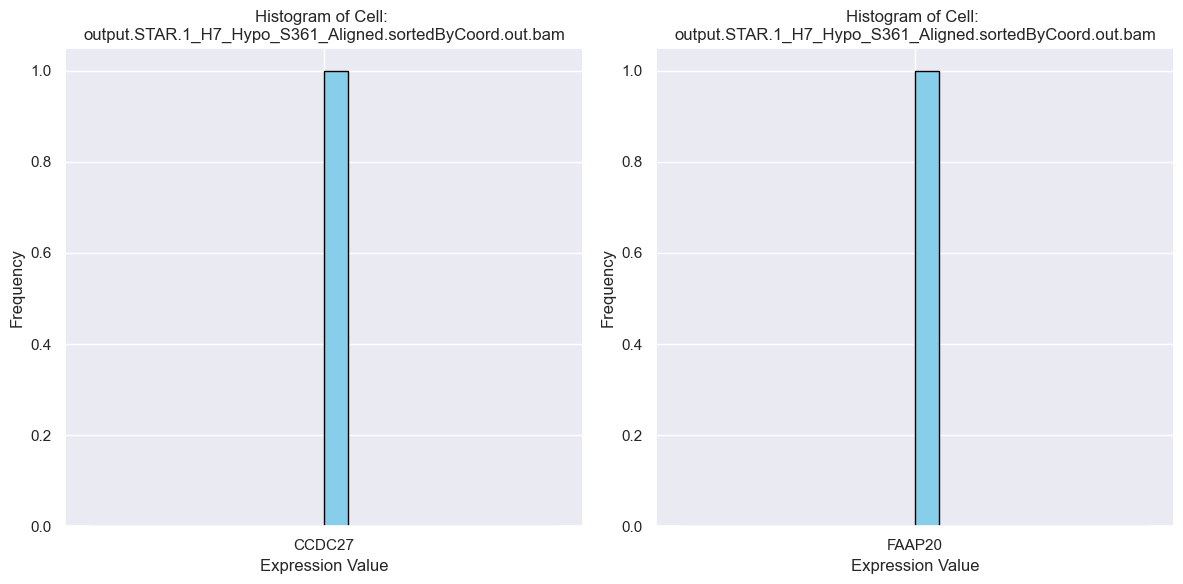

In [90]:
# We can see from the minimum value obtained that there are some cells that are 
# completely uncorrelated from the others and we want to see why
# Find the indices of the minimum value in the correlation matrix
data_tensor_transpose = data_tensor.T
print("Size of data matrix:", data_tensor_transpose.shape)
correlation_matrix_transpose = th.corrcoef(data_tensor_transpose)
print("Size of correlation matrix:", correlation_matrix_transpose.shape)

# Find the indices of the minimum value in the correlation matrix
min_indices = th.nonzero(correlation_matrix_transpose == correlation_matrix_transpose.min())
print("Indices of the minimum value in the correlation matrix: ", min_indices)

# Access the indices
for index in min_indices:
    value1 = index[0].item()
    value2 = index[1].item()
    # Access rows with index value1 and value2
    cells_identified = merged.iloc[[value1, value2]]
    print(f"Cell names with minimum correlation: {cells_identified.index[0]}, {cells_identified.index[1]}")

# Plot the histogram of the cells with minimum correlation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(merged.columns[value1], bins=20, color='skyblue', edgecolor='black')
# set title with corresponding cell index

axs[0].set_title(f'Histogram of Cell: \n{cells_identified.index[0]}', fontsize=12)
axs[0].set_xlabel('Expression Value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[1].hist(merged.columns[value2], bins=20, color='skyblue', edgecolor='black')
axs[1].set_title(f'Histogram of Cell: \n{cells_identified.index[0]}', fontsize=12)
axs[1].set_xlabel('Expression Value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


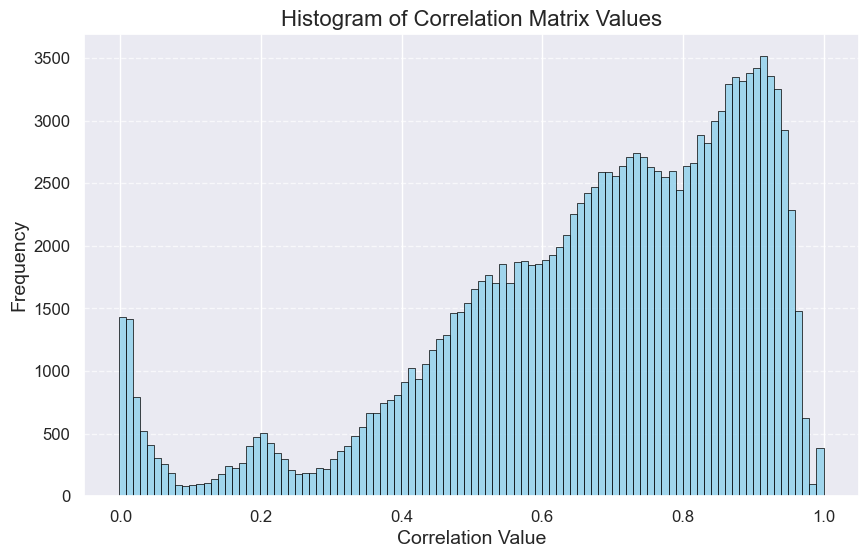

In [91]:
# Correlation between cells (samples)
# Plot histogram of the values to see the distribution
data_tensor = th.tensor(merged.values)
correlation_matrix_transpose = th.corrcoef(data_tensor)
plt.figure(figsize=(10, 6))
sns.histplot(correlation_matrix_transpose.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Correlation Matrix Values', fontsize=16)
plt.xlabel('Correlation Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Clear that we have peaks at high correlation values between cells. In principle, this is explained by the fact that every 
# gene expression in the table is coming from the same cell line we expect overall an high correlation among them.

(383, 383)


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/filipporonzino/anaconda3/lib/python3.11/site-pa

[]

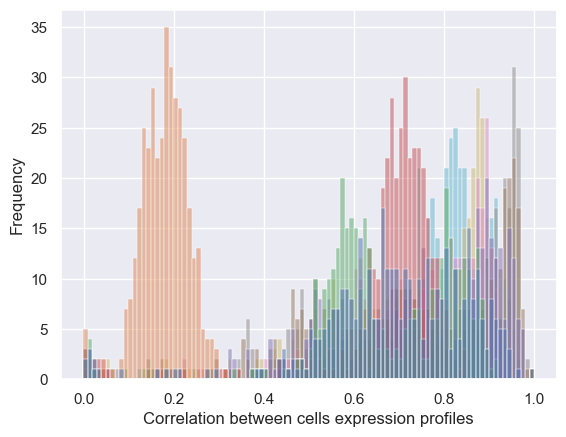

In [92]:
# We now can plot the distribution of the correlation between gene expression profiles using a 
# histogram (we do it on the first ten variables)

correlation_matrix = pd.DataFrame(correlation_matrix_transpose)
print(correlation_matrix.shape)
c_subset = correlation_matrix.iloc[:,:10]
sns.histplot(c_subset,bins=100)
plt.legend().set_visible(False)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')
plt.plot()


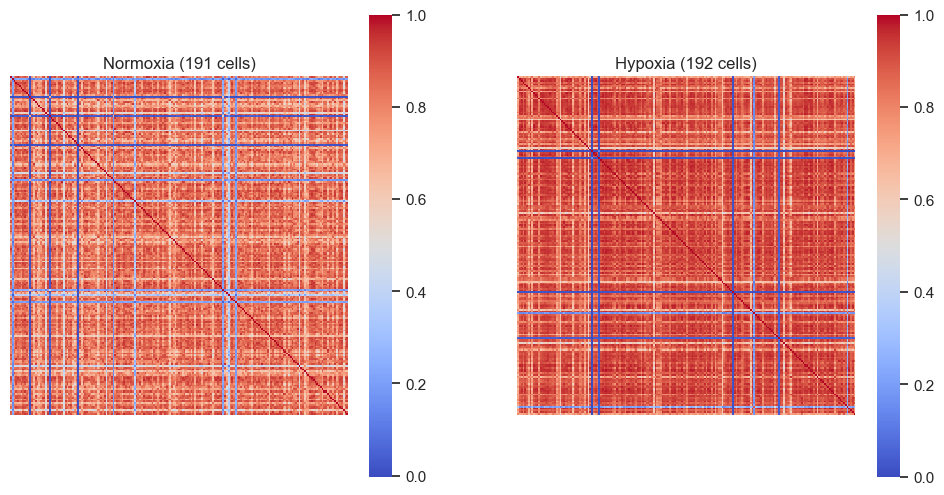

Shape of correlation matrix for normoxia: torch.Size([191, 191])
Shape of correlation matrix for hypoxia: torch.Size([192, 192])


In [93]:
# Now let us inspect if the correlation is different between the two classes
# We can do this by plotting the correlation matrix for each class separately
# We can do this by splitting the dataframe into two dataframes, one for each class


# Convert the DataFrames to PyTorch tensors
data_tensor_norm = th.tensor(merged_norm.values)
data_tensor_hypo = th.tensor(merged_hypo.values)

# Calculate the correlation matrices
correlation_matrix_norm = th.corrcoef(data_tensor_norm)
correlation_matrix_hypo = th.corrcoef(data_tensor_hypo)

# Plot the correlation matrices with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(correlation_matrix_norm, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[0], square=True)
sns.heatmap(correlation_matrix_hypo, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[1], square=True)
# Set titles with number of genes that are norm or hypo
axs[0].set_title(f'Normoxia ({merged_norm.shape[0]} cells)')
axs[1].set_title(f'Hypoxia ({merged_hypo.shape[0]} cells)')
plt.show() 

# Check shape of correlation matrices
print("Shape of correlation matrix for normoxia:", correlation_matrix_norm.shape)
print("Shape of correlation matrix for hypoxia:", correlation_matrix_hypo.shape)

________________________________________________________________________________________________________________________
We do the same for the transpose dataset (genes as rows and cells as columns): 

In [94]:
# we simply transpose again the dataframe (now we have cells as columns)
print("Dataframe dimension before transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt = df_seq_MUnfilt.T
print("Dataframe dimension after transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt.head(5)

Dataframe dimension before transpose: (383, 22934)
Dataframe dimension after transpose: (22934, 383)


,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH9P,1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MTND1P23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [95]:

print("Missing values in the dataframe by columns:", df_seq_MUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_MUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      0
                                                           ..
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    0
Length: 383, dtype: int64
Missing values in the whole dataframe: 0


In [96]:
df_seq_MUnfilt.describe()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
count,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,...,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000
mean,40.817651,0.012253,86.442400,1.024636,14.531351,56.213613,75.397183,62.767725,67.396747,2.240734,...,17.362562,42.080230,34.692422,32.735284,21.992718,17.439391,49.242784,61.545609,68.289352,62.851400
std,465.709940,0.207726,1036.572689,6.097362,123.800530,503.599145,430.471519,520.167576,459.689019,25.449630,...,193.153757,256.775704,679.960908,300.291051,153.441647,198.179666,359.337479,540.847355,636.892085,785.670341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,5.000000,0.000000,7.000000,23.000000,39.000000,35.000000,38.000000,1.000000,...,9.000000,30.000000,0.000000,17.000000,12.000000,9.000000,27.000000,30.000000,38.000000,33.000000
max,46744.000000,14.000000,82047.000000,289.000000,10582.000000,46856.000000,29534.000000,50972.000000,36236.000000,1707.000000,...,17800.000000,23355.000000,81952.000000,29540.000000,12149.000000,19285.000000,28021.000000,40708.000000,46261.000000,68790.000000


In [97]:
# Just renaming
mergedT = df_seq_MUnfilt

Outliers for the transpose dataset (rows are genes)

In [ ]:
# # TO REVIEW
# np.random.seed(42)

# # Number of boxplots you want to create
# num_boxplots = 5

# # Randomly select column indices
# random_columns = np.random.choice(mergedT.columns[1:], num_boxplots, replace=False)


# plt.figure(figsize=(12, 8))  
# for i, column in enumerate(random_columns):
#     plt.subplot(1, len(random_columns), i+1)
    
#     # Customizing boxplot appearance
#     sns.boxplot(y=mergedT[column], color='skyblue', width=0.5)
    
#     # Overlaying swarmplot for better visualization of individual data points
#     sns.swarmplot(y=mergedT[column], color='red', alpha=0.5)
    
#     plt.title(f'Boxplot of {column}', fontsize=14)
#     plt.ylabel('Count of the gene expression', fontsize=12)
#     plt.xlabel('', fontsize=12)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.grid(True)


# plt.tight_layout()
# plt.show()

In [98]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = mergedT.quantile(0.25)
Q3 = mergedT.quantile(0.75)
IQR = Q3 - Q1
outliers = (mergedT < (Q1 - 1.5 * IQR)) | (mergedT > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    3751
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam     188
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    5329
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      4739
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      3511
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    3286
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    3490
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    3410
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    3306
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    3250
Length: 383, dtype: int64
14.45%


In [ ]:
Now we analyze distribution of the transpose dataset (rows are genes)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


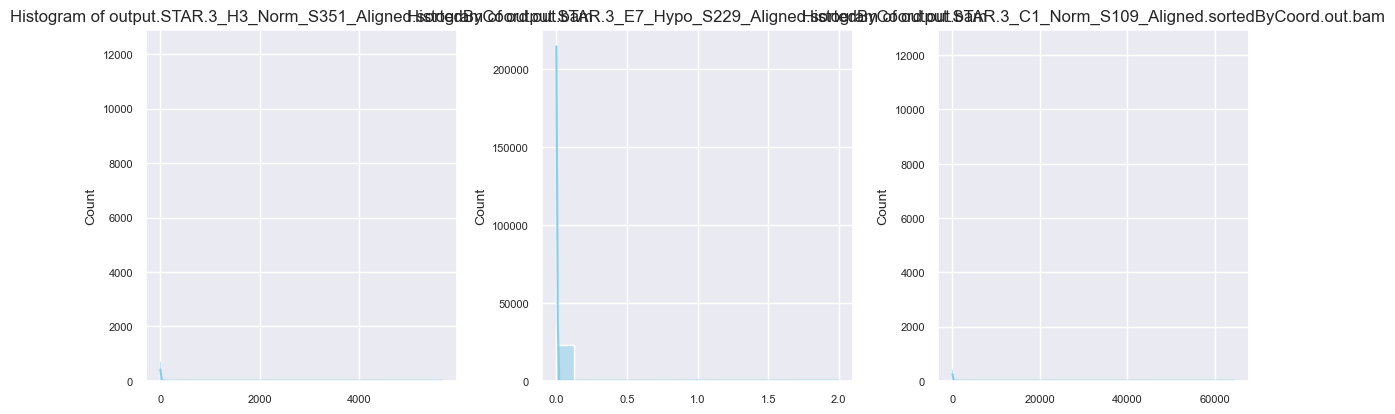

In [99]:
#visualize the distribution of the data through histograms
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(mergedT.columns[1:], num_boxplots, replace=False)



fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    sns.histplot(mergedT[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    # rescale the y-axis to better visualize the distribution
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# Calculate skewness for each column in your DataFrame
skewness_valuesT = mergedT[random_columns].skew()

# Print skewness values
print("Skewness for each selected feature:")
print(skewness_valuesT)

Skewness for each selected feature:
output.STAR.3_H3_Norm_S351_Aligned.sortedByCoord.out.bam    44.583959
output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam    33.611441
output.STAR.3_C1_Norm_S109_Aligned.sortedByCoord.out.bam    80.426131
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


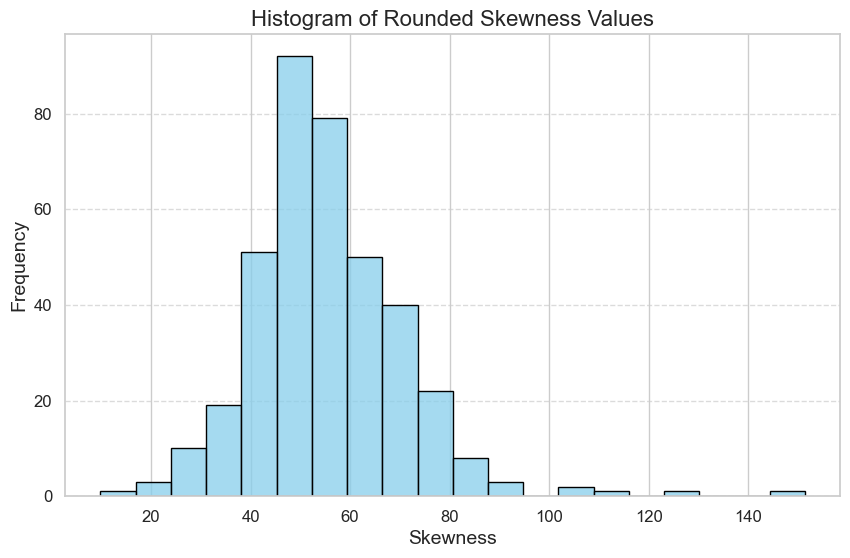

In [101]:
# Calculate skewness for each column in your DataFrame
skewness_valuesT = mergedT.skew()

# Round the skewness values
rounded_skewnessT_values = np.round(skewness_valuesT, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_skewnessT_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Skewness Values', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [102]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_valuesT = mergedT[random_columns].kurtosis()

# Print kurtosis values
print("Kurtosis for each feature:")
print(kurtosis_valuesT)

Kurtosis for each feature:
output.STAR.3_H3_Norm_S351_Aligned.sortedByCoord.out.bam    2916.359950
output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam    1269.722905
output.STAR.3_C1_Norm_S109_Aligned.sortedByCoord.out.bam    7702.672553
dtype: float64


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


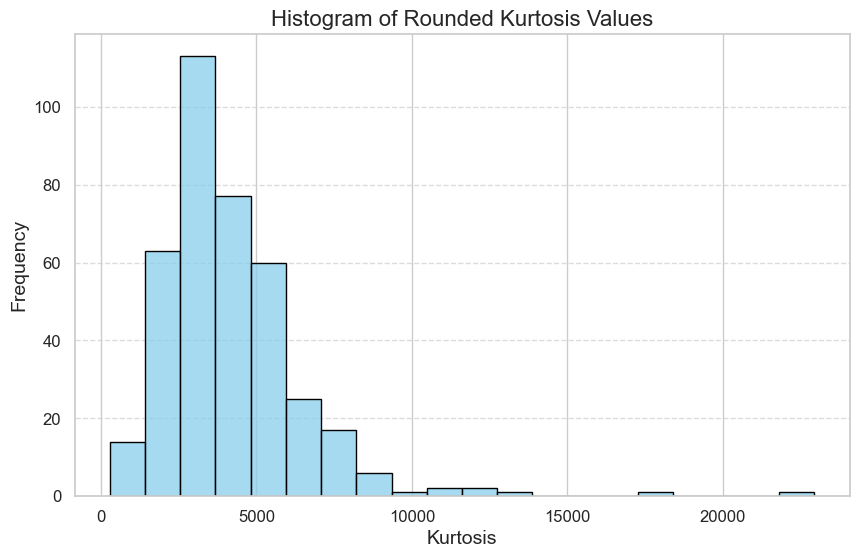

In [103]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_valuesT = mergedT.kurtosis()

# Round the kurtosis values
rounded_kurtosisT_values = np.round(kurtosis_valuesT, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded kurtosis values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_kurtosisT_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Kurtosis Values', fontsize=16)
plt.xlabel('Kurtosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [104]:
# Test normality using the Kolmogorov-Smirnov test impl. before
non_normal_countT = test_distribution_per_feature(mergedT)

Number of features with non-normal distribution: 383
All features have non-normal distribution


In [105]:
# Now test other distribition in the same way
test_poissondistribution_per_feature(mergedT)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Number of features that might have poisson distribution: 5
Some features might have poisson distribution


['output.STAR.1_G12_Hypo_S318_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_H5_Norm_S341_Aligned.sortedByCoord.out.bam',
 'output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoord.out.bam',
 'output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam']

In [ ]:
# ADD PLOT

In [106]:
test_negative_binomial_distribution_per_feature(mergedT)

Number of features with Negative Binomial distribution: 5
Some features might have Negative Binomial distribution


['output.STAR.1_D8_Hypo_S170_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_E1_Norm_S193_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_F10_Hypo_S268_Aligned.sortedByCoord.out.bam',
 'output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoord.out.bam',
 'output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam']

In [ ]:
# ADD PLOT

In [ ]:
#test_gamma_distribution_per_feature(mergedT)

________________________________________________________________________________________________________________________

Normalization, now we will work on the transpose dataset (genes as rows and cells as columns)

In [107]:
mergedT.shape

(22934, 383)

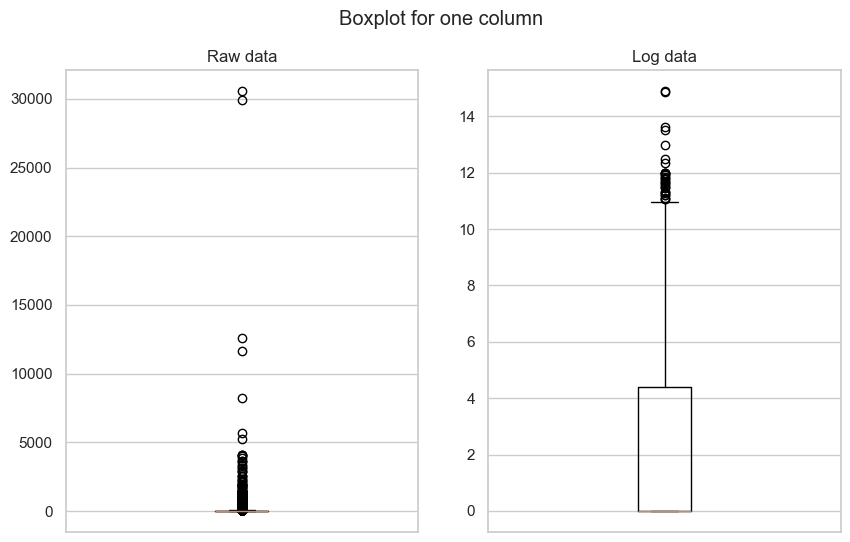

In [110]:
# Highly non normal distribution hence we take concave transformations the features
# Inspect first a single randomly selected feature

# we are using the transposed dataset

# Select a random index with seed
np.random.seed(42)
randomindex = np.random.randint(0, mergedT.shape[1])

# We will directly use the log transformation as we did for the first dataset
mergedT_log2 = np.log2(mergedT[mergedT.columns[randomindex]]+1)
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one column")
axs[0].boxplot(mergedT[mergedT.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(mergedT_log2)
axs[1].set_title("Log data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

Skewness of raw data: 64.2250697759493
Skewness of log transformed data: 0.8777158294432641


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


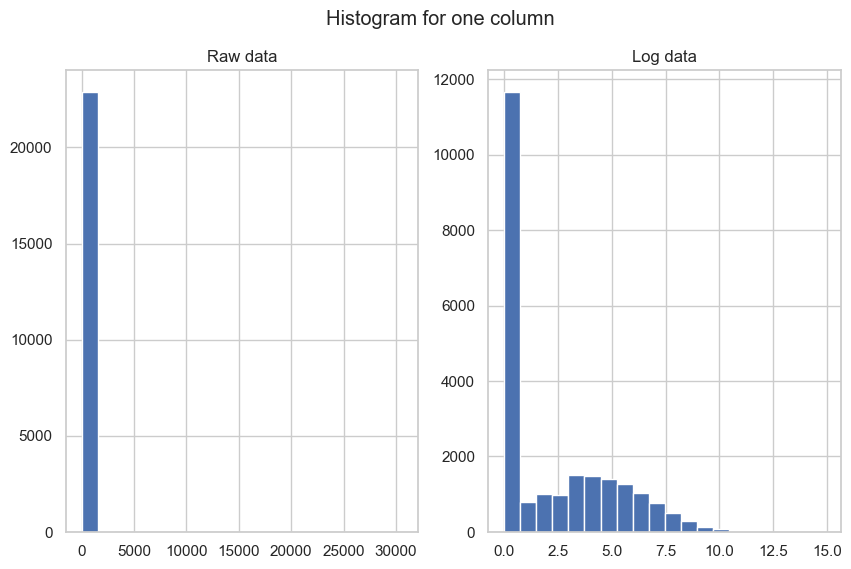

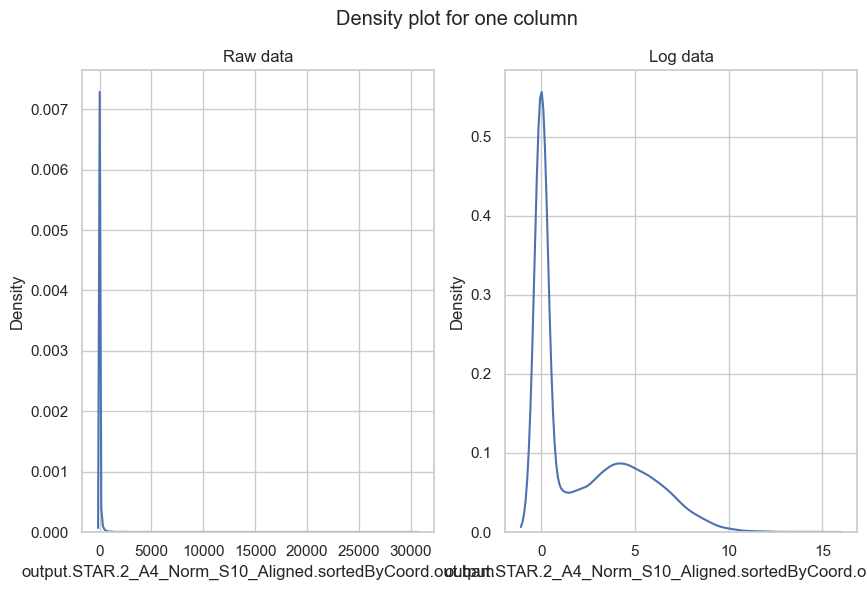

In [111]:
# Prove that log transformation is the best
# Calculate the skewness of the raw data
skewness_raw = mergedT[mergedT.columns[randomindex]].skew()
# Calculate the skewness of the log transformed data
skewness_log = np.log2(mergedT[mergedT.columns[randomindex]]+1).skew()
# Print the skewness values
print(f"Skewness of raw data: {skewness_raw}")
print(f"Skewness of log transformed data: {skewness_log}")

# Plot the histogram of transformed column, inspect why the skewness is negative
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Histogram for one column")
axs[0].hist(mergedT[mergedT.columns[randomindex]], bins=20)
axs[0].set_title("Raw data")
axs[0].grid(True)
axs[1].hist(mergedT_log2, bins=20)
axs[1].set_title("Log data")
axs[1].grid(True)

# Plot the density of the transformed column
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Density plot for one column")
sns.kdeplot(mergedT[mergedT.columns[randomindex]], ax=axs[0])
axs[0].set_title("Raw data")
axs[0].grid(True)
sns.kdeplot(mergedT_log2, ax=axs[1])
axs[1].set_title("Log data")
axs[1].grid(True)


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

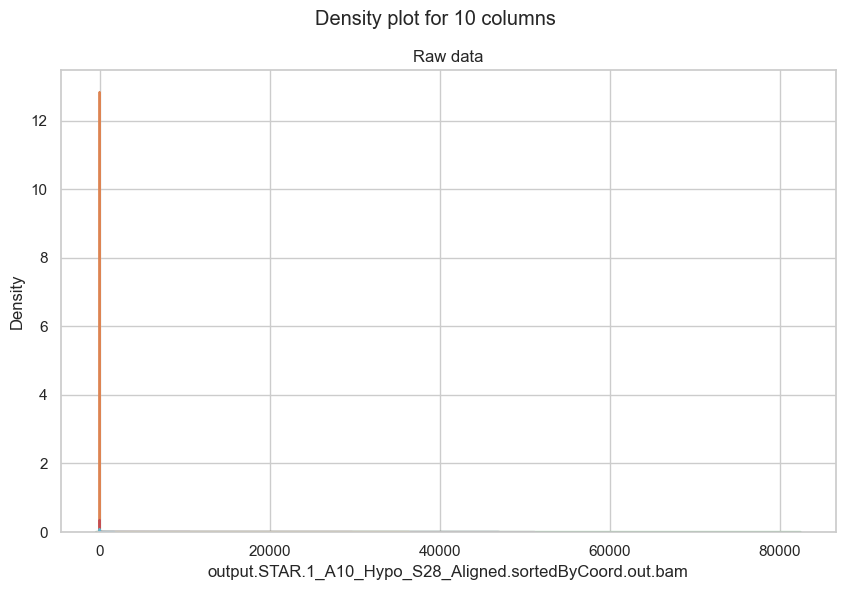

In [112]:
# Plot the densities of 10 randomly selected features all in one plot with sns with rescaled x axis
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.suptitle("Density plot for 10 columns")
for i in range(10):
    sns.kdeplot(mergedT[mergedT.columns[i]], ax=ax)
ax.set_title("Raw data")
# Rescale x axis
ax.grid(True)
plt.show()


In [116]:
# Ideally we see log worked the best for this randomly selected random feature, now we apply the 3 on all the dataset
# Apply the log transformation to the entire dataset
mergedT_log = np.log2(mergedT+1)
# Check skewness of the transformed data
skewness_log = mergedT_log.skew()
# Print the skewness values
print(f"Mean Skewness of log transformed data: {skewness_log.mean()}")


Mean Skewness of log transformed data: 2.4853469964955677


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


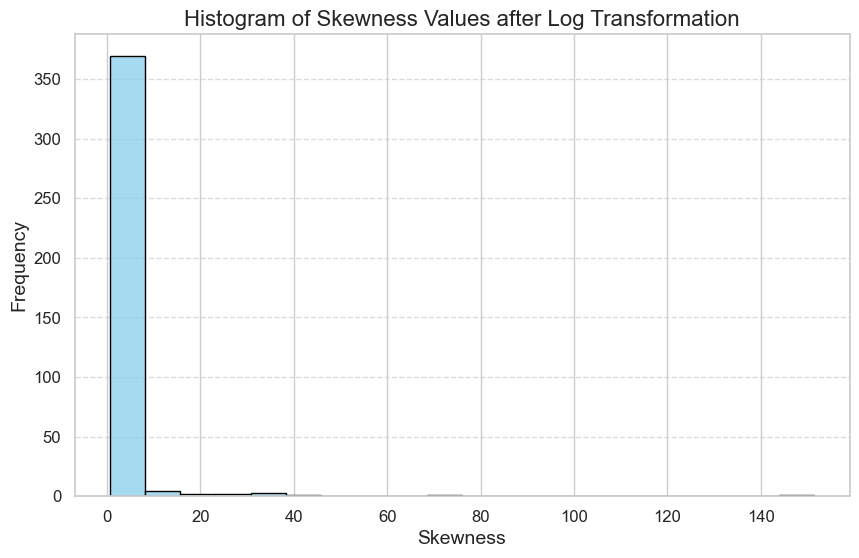

In [117]:
# Histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(skewness_log, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Skewness Values after Log Transformation', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We use CPM (Counts Per Million) normalization, which is a common normalization technique for RNA-seq data. It is calculated as follows:
CPM values are calculated by dividing the number of reads mapped to a gene by a million scaling factor divided by the total of mapped reads.